# Affective Computing - Sentiment Analysis Project
## Luka Cabraja

<p>In the realm of natural language processing, sentiment analysis stands out as a critical challenge, where the objective is to discern the emotional tone behind a body of text. This task is far from trivial, as it involves understanding context, irony, and subtlety in language use. Our problem specifically revolves around analyzing sentiments in dialogue, a complex task due to the dynamic nature of conversational exchanges and the layers of emotional subtext that can vary from one sentence to the next.</p>

<p>The dataset at the heart of our sentiment analysis model is the meticulously curated DailyDialog, a collection notable for its high-quality, multi-turn dialogues that are reflective of everyday human interaction. Crafted with human-written exchanges and marked by minimal noise, it spans a spectrum of topics pertinent to daily life. Each dialogue is manually annotated with nuanced details of communication intentions and emotions, providing a richly layered context for our analytical models. Our ambition is to leverage this dataset to not only assess but also advance the current methodologies in the dialog system research domain.</p>

In [126]:
act_label = {
    '0': '__dummy__',
    '1': 'inform',
    '2': 'question',
    '3': 'directive',
    '4': 'commissive',
}

emotion_label = {
    '0': 'no emotion',
    '1': 'anger',
    '2': 'disgust',
    '3': 'fear',
    '4': 'happiness',
    '5': 'sadness',
    '6': 'surprise',
}

sentiment_label = {
    '0': 'neutral',
    '1': 'positive',
    '-1': 'negative',
}

def get_act_label(act):
    return act_label[act]

def get_emotion_label(emotion):
    return emotion_label[emotion]

def get_sentiment_label(sentiment):
    return sentiment_label[sentiment]

In [ ]:
import pandas as pd

# Function for reading file
def read_file(file_path):
    with open(file_path, 'r', encoding='UTF-8') as file:
        return file.readlines()

# Function for creating csv file from the given dataset
def create_csv_file(file_name):

    # Load data from files
    dialogues_text = read_file('dataset/dialogues_text.txt')
    dialogues_act = read_file('dataset/dialogues_act.txt')
    dialogues_emotion = read_file('dataset/dialogues_emotion.txt')
    dialogues_topic = read_file('dataset/dialogues_topic.txt')

    # Processing raw data and creating a list of dictionaries
    data = []
    for idx, (text, act, emotion, topic) in enumerate(zip(dialogues_text, dialogues_act, dialogues_emotion, dialogues_topic)):
        utterances = [u.strip() for u in text.strip().split('__eou__')[:-1]]
        acts = act.strip().split()
        emotions = emotion.strip().split()
        topic = topic.strip()
        
        for utterance_idx, (utterance, act, emotion) in enumerate(zip(utterances, acts, emotions)):
            data.append({
                'DialogueIndex': idx,
                'UtteranceIndex': utterance_idx,
                'SpeakerIndex': utterance_idx % 2,
                'Utterance': utterance,
                'Dialogue': text,
                'Act': int(act),
                'Emotion': int(emotion),
                'Topic': int(topic)
            })
    # Create csv file from DataFrame
    df = pd.DataFrame(data)
    df.to_csv('dataset.csv', index=False, sep=';')    

In [ ]:
import os

#if('dataset.csv' not in os.listdir()):
#create_csv_file('dataset.csv')

df = pd.read_csv('dataset.csv', sep=';')

df.head()

In [ ]:
# Function for getting the number of dialogues
def get_number_of_dialogues(df):
    return df['DialogueIndex'].nunique()

# Function for getting the number of utterances
def get_number_of_utterances(df):
    return df.shape[0]

# Function for getting the number of speakers
def get_number_of_speakers(df):
    return df['SpeakerIndex'].nunique()

# Function for getting the number of acts
def get_number_of_acts(df):
    return df['Act'].nunique()

# Function for getting the number of emotions
def get_number_of_emotions(df):
    return df['Emotion'].nunique()

# Function for getting the number of topics
def get_number_of_topics(df):
    return df['Topic'].nunique()

print('Number of dialogues:', get_number_of_dialogues(df))
print('Number of utterances:', get_number_of_utterances(df))
print('Number of speakers:', get_number_of_speakers(df))
print('Number of acts:', get_number_of_acts(df))
print('Number of emotions:', get_number_of_emotions(df))
print('Number of topics:', get_number_of_topics(df))

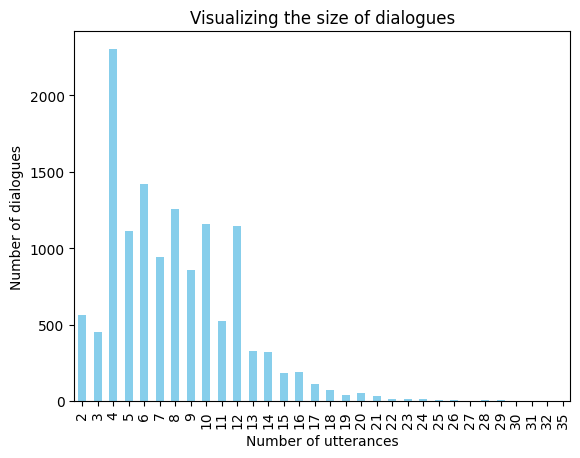

In [124]:
# import library for visualing the data
import matplotlib.pyplot as plt

# Function for visualizing the number of dialogues
def visualize_number_of_dialogues(df):
    df['DialogueIndex'].value_counts().value_counts().sort_index().plot(kind='bar', color='skyblue')
    plt.title('Visualizing the size of dialogues')
    plt.xlabel('Number of utterances')
    plt.ylabel('Number of dialogues')
    plt.show()

visualize_number_of_dialogues(df)

The histogram presents the distribution of dialogues according to their size, measured by the number of utterances (which can be assumed to be individual contributions or lines of dialogue).
Observations:
<ul>
    <li>Skewness: The distribution is right-skewed, meaning there are more dialogues with a smaller number of utterances. This suggests that in the dataset being analyzed, shorter dialogues are more common than longer ones.</li>
    
<li>Common Range: The most common dialogue sizes are between 2 and 12 utterances, with a peak at 4 utterances. This is evident from the height of the bars in that range</li>

<li>Tail of the Distribution: There's a long tail extending towards the right, which indicates that there are fewer dialogues with a large number of utterances. However, the presence of this tail also indicates that while they are less common, there is a variety of dialogue lengths present in the data.</li>

<li>Outliers: Dialogues with more than 30 utterances are rare, as seen by the very short bars at the tail end of the histogram. These can be considered outliers in the dataset.</li>

<li>Possible Mean and Median: Given the skewness, the mean number of utterances is likely to be higher than the median. This is typical for a right-skewed distribution.</li>
</ul>

no emotion 85572
anger 1022
disgust 353
fear 174
happiness 12885
sadness 1150
surprise 1823


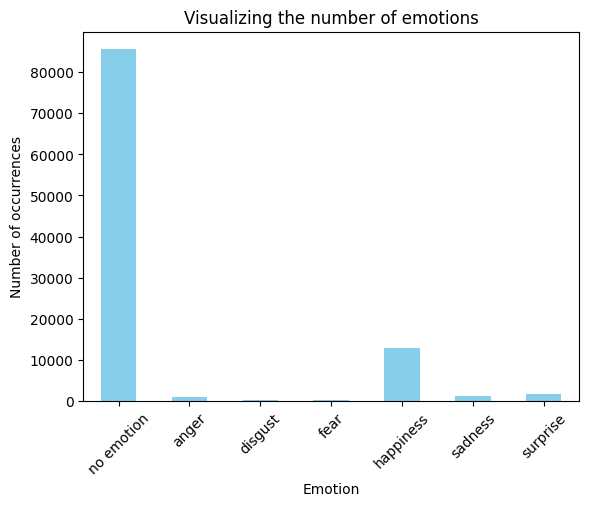

In [127]:
# import library for visualing the data
import matplotlib.pyplot as plt

# Function for visualizing the number of emotions in the dataset
def visualize_number_of_emotions(df):
    # Count the number of emotions
    emotion_counts = df['Emotion'].value_counts().sort_index()
    # Create a bar plot
    emotion_counts.plot(kind='bar', color='skyblue')
    plt.title('Visualizing the number of emotions')
    plt.xlabel('Emotion')
    plt.ylabel('Number of occurrences')
    plt.xticks([i for i in range(7)], [get_emotion_label(str(i)) for i in range(7)], rotation=45)
    plt.show()

# Print number of emotions
emotion_counts = df['Emotion'].value_counts().sort_index()
# Print the number of occurrences for each label of emotion use get_emotion_label function
for i in range(7):
    print(get_emotion_label(str(i)), emotion_counts[i])

visualize_number_of_emotions(df)

# Exploratory Data Analysis: Distribution of Emotions in Sentences
<p>In this section, we explore the distribution of emotions present in a dataset of sentences. The dataset comprises various sentences categorized based on the emotions they express.</p>

### Emotion Distribution:
<ul>
    <li>No Emotion: 85572 sentences</li>
    <li>Anger: 1022 sentences</li>
    <li>Disgust: 353 sentences</li>
    <li>Fear: 174 sentences</li>
    <li>Happiness: 12885 sentences</li>
    <li>Sadness: 1150 sentences</li>
    <li>Surprise: 1823 sentences</li>
</ul>

### Insights:
<p>The majority of sentences (85572) do not convey a specific emotion.
Happiness is the most prevalent emotion, with 12885 occurrences in the dataset.
Anger, Disgust, and Fear have relatively low representation compared to No Emotion and Happiness.
Surprise, while not as common as Happiness, has a significant presence in the dataset.
Sadness, though less frequent than Happiness, is more prevalent than Anger, Disgust, and Fear combined.
This distribution provides valuable insights into the emotional content present in the dataset and sets the stage for further analysis and exploration of the emotional tone within the sentences. </p>

In [44]:
# Import the sentiment analysis library
from textblob import TextBlob

# Function to perform sentiment analysis
def sentiment_analysis(text):
  blob = TextBlob(text)
  return -1 if blob.sentiment.polarity < -0.5 else (1 if blob.sentiment.polarity > 0.5 else 0)

def get_sentiment(emotion):
    if emotion in [4]:
        return 1
    elif emotion in [1, 2, 3, 5]:
        return -1
    else:
        return 0

In [128]:
# Creating a new column for the sentiment of the utterances
df['sentiment_base'] = df['Emotion'].apply(get_sentiment)
df['sentiment_calculated'] = df['Utterance'].apply(sentiment_analysis)

In [129]:
# Function for comparing how accurate sentiment calculation is
def compare_sentiment(df):
    return (df['sentiment_base'] == df['sentiment_calculated']).mean()

print('Accuracy of sentiment analysis:', round(compare_sentiment(df), 2) * 100, '%')

Accuracy of sentiment analysis: 82.0 %


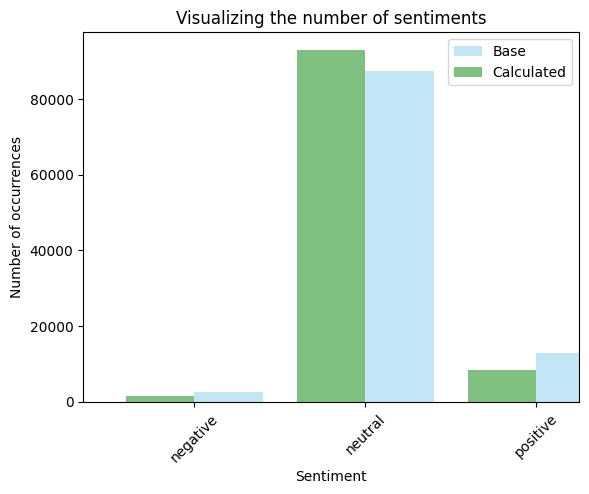

In [130]:
# Function for visualizing the number of sentiments base vs calculated 
def visualize_number_of_sentiments(df):
    # Count the number of sentiments
    sentiment_counts = df['sentiment_base'].value_counts().sort_index()
    sentiment_calculated_counts = df['sentiment_calculated'].value_counts().sort_index()
    # Create a bar plot
    sentiment_counts.plot(kind='bar', color='skyblue', alpha=0.5, position=0, width=0.4, label='Base')
    sentiment_calculated_counts.plot(kind='bar', color='green', alpha=0.5, position=1, width=0.4, label='Calculated')
    plt.title('Visualizing the number of sentiments')
    plt.xlabel('Sentiment')
    plt.ylabel('Number of occurrences')
    plt.xticks([i for i in range(3)], [get_sentiment_label(str(i)) for i in range(-1, 2)], rotation=45)
    plt.legend()
    plt.show()

visualize_number_of_sentiments(df)

<p>The sentiment analysis yielded an accuracy rate of 82%, a commendable result indicating a reasonable performance in discerning sentiments from the dataset of sentences. However, it's crucial to delve deeper into the intricacies of the analysis. Notably, the TextBlob library, employed for sentiment analysis, exhibits a bias toward neutral sentiment and may misclassify negative and positive sentiments as neutral. Consequently, the distribution of sentiments within the dataset might be skewed, with a higher prevalence of neutral sentiments. This bias towards neutrality may have led to an underestimation of both negative and positive sentiments, potentially impacting the overall accuracy of sentiment classification. The code utilized for sentiment analysis employs a polarity-based approach, categorizing sentiments as negative, neutral, or positive based on predefined polarity thresholds. While the accuracy achieved is noteworthy, further refinement and calibration of sentiment analysis techniques may be warranted to mitigate biases and enhance the accuracy of sentiment classification
</p>

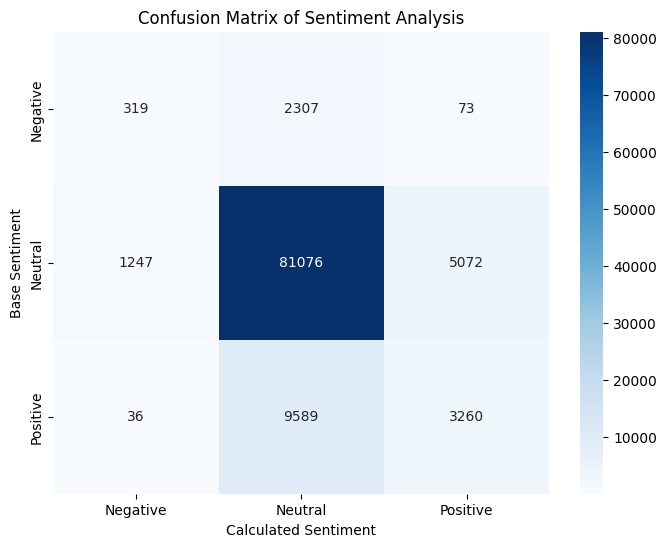

In [131]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Creating confusion matrix
cm = confusion_matrix(df['sentiment_base'], df['sentiment_calculated'])

# Plotting the confusion matrix to visualize the sentiment analysis
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Calculated Sentiment')
plt.ylabel('Base Sentiment')
plt.title('Confusion Matrix of Sentiment Analysis')
plt.show()


<p>By scrutinizing the matrix, we can identify the specific areas where improvements in sentiment classification are needed, thereby guiding the refinement and optimization of the sentiment analysis algorithm. Moreover, the confusion matrix serves as a diagnostic tool, shedding light on the strengths and weaknesses of the sentiment analysis model and highlighting areas for further investigation and enhancement. Through a comprehensive analysis of the confusion matrix, we gain valuable insights.</p>

<p>Continuing from the insights gleaned from the confusion matrix, our selected model's architecture—comprising an Embedding layer, LSTM, and a Dense layer with softmax—was chosen to address these findings. This architecture aims to capture the complex temporal dependencies and nuanced emotional contexts within dialogues. The balance struck between model complexity and predictive accuracy is reflected in the validation results, indicating a promising direction for future enhancements.</p>

In [59]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Input, concatenate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


# Step 1: Preprocess the Text Data
texts = df['Utterance'].values
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
data = pad_sequences(sequences, maxlen=100)

# Step 2: Prepare the Labels
labels = to_categorical(df['Emotion'].values)


# Step 3: Split the Data into train, test and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(data, labels, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


# Step 4: Build the Model
model = Sequential()
model.add(Embedding(10000, 128))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(labels.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Step 5: Train the Model
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

# Step 6: Evaluate the Model on the validation set
test_loss, test_acc = model.evaluate(X_val, y_val)
print(f'Validation Accuracy: {test_acc*100:.2f}%')
# Epoch 2 0.8551

Epoch 1/10
2253/2253 ━━━━━━━━━━━━━━━━━━━━ 98s 43ms/step - accuracy: 0.8394 - loss: 0.5869 - val_accuracy: 0.8556 - val_loss: 0.4550
Epoch 2/10
2253/2253 ━━━━━━━━━━━━━━━━━━━━ 98s 44ms/step - accuracy: 0.8647 - loss: 0.4148 - val_accuracy: 0.8551 - val_loss: 0.4394
Epoch 3/10
2253/2253 ━━━━━━━━━━━━━━━━━━━━ 98s 43ms/step - accuracy: 0.8759 - loss: 0.3553 - val_accuracy: 0.8509 - val_loss: 0.4477
Epoch 4/10
2253/2253 ━━━━━━━━━━━━━━━━━━━━ 98s 43ms/step - accuracy: 0.8845 - loss: 0.3200 - val_accuracy: 0.8513 - val_loss: 0.4587
Epoch 5/10
2253/2253 ━━━━━━━━━━━━━━━━━━━━ 98s 44ms/step - accuracy: 0.8929 - loss: 0.2922 - val_accuracy: 0.8483 - val_loss: 0.4795
Epoch 6/10
2253/2253 ━━━━━━━━━━━━━━━━━━━━ 98s 44ms/step - accuracy: 0.8983 - loss: 0.2719 - val_accuracy: 0.8475 - val_loss: 0.4983
Epoch 7/10
2253/2253 ━━━━━━━━━━━━━━━━━━━━ 98s 44ms/step - accuracy: 0.9051 - loss: 0.2526 - val_accuracy: 0.8480 - val_loss: 0.5207
Epoch 8/10
2253/2253 ━━━━━━━━━━━━━━━━━━━━ 104s 46ms/step - accuracy: 0.9092 

<p>Upon reviewing the model's performance over 10 epochs, it's evident that while training accuracy improves, reaching a peak of 91.87%, and training loss reduces to 0.2099, the validation accuracy experiences a slight decrease to 84.07%, with an uptick in validation loss. This discrepancy suggests the model is overfitting, mastering the training data nuances yet faltering on unseen data. To address this overfitting and enhance the model's ability to generalize, we plan to augment the model with additional context by incorporating metadata—specifically, `DialogueIndex`, `UtteranceIndex`, `SpeakerIndex`, `Act`, and `Topic`. By infusing the model with this richer dataset, we aim to provide a broader data spectrum, potentially improving its predictive accuracy and generalization capabilities across diverse datasets.</p>

In [60]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Input, concatenate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Step 1: Preprocess the Text Data
texts = df['Utterance'].values
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
data = pad_sequences(sequences, maxlen=100)

# Step 1.5: Preprocess the metadata
metadata = df[['DialogueIndex', 'UtteranceIndex', 'SpeakerIndex', 'Act', 'Topic']].values
encoder = OneHotEncoder()
metadata_encoded = encoder.fit_transform(metadata)


# Step 2: Prepare the Labels
labels = to_categorical(df['Emotion'].values)


# Step 3: Split the Data into train, test and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(np.hstack((text_data, metadata)), labels, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Separate text and metadata after split
X_train_text = X_train[:, :100]  # Assuming the first 100 columns are text data due to padding
X_train_meta = X_train[:, 100:]  # The rest are metadata

X_test_text = X_test[:, :100]
X_test_meta = X_test[:, 100:]

X_val_text = X_val[:, :100]
X_val_meta = X_val[:, 100:]


# Step 4: Build the Model
text_input = Input(shape=(100,), name='text_input')
meta_input = Input(shape=(X_train_meta.shape[1],), name='meta_input')

text_embedded = Embedding(10000, 128)(text_input)
text_lstm = LSTM(64, dropout=0.2, recurrent_dropout=0.2)(text_embedded)

meta_dense = Dense(32, activation='relu')(meta_input)
meta_dropout = Dropout(0.2)(meta_dense)

concatenated = concatenate([text_lstm, meta_dropout])
output = Dense(labels.shape[1], activation='softmax')(concatenated)

model = Model(inputs=[text_input, meta_input], outputs=output)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# # Step 5: Train the Model
model.fit([X_train_text, X_train_meta], y_train, batch_size=32, epochs=10, validation_data=([X_test_text, X_test_meta], y_test))


# # Step 6: Evaluate the Model on the test set
test_loss, test_acc = model.evaluate([X_val_text, X_val_meta], y_val)
print(f'Validation Accuracy: {test_acc*100:.2f}%')
# epoch 5 0.8603


Epoch 1/10
2253/2253 ━━━━━━━━━━━━━━━━━━━━ 99s 43ms/step - accuracy: 0.6652 - loss: 148.6549 - val_accuracy: 0.8257 - val_loss: 0.9977
Epoch 2/10
2253/2253 ━━━━━━━━━━━━━━━━━━━━ 103s 46ms/step - accuracy: 0.8384 - loss: 0.7040 - val_accuracy: 0.7791 - val_loss: 0.6743
Epoch 3/10
2253/2253 ━━━━━━━━━━━━━━━━━━━━ 101s 45ms/step - accuracy: 0.8527 - loss: 0.5219 - val_accuracy: 0.8571 - val_loss: 0.5244
Epoch 4/10
2253/2253 ━━━━━━━━━━━━━━━━━━━━ 99s 44ms/step - accuracy: 0.8709 - loss: 0.3861 - val_accuracy: 0.8595 - val_loss: 0.4442
Epoch 5/10
2253/2253 ━━━━━━━━━━━━━━━━━━━━ 98s 44ms/step - accuracy: 0.8887 - loss: 0.3180 - val_accuracy: 0.8603 - val_loss: 0.4565
Epoch 6/10
2253/2253 ━━━━━━━━━━━━━━━━━━━━ 100s 44ms/step - accuracy: 0.8956 - loss: 0.2887 - val_accuracy: 0.8511 - val_loss: 0.4733
Epoch 7/10
2253/2253 ━━━━━━━━━━━━━━━━━━━━ 101s 45ms/step - accuracy: 0.9029 - loss: 0.2696 - val_accuracy: 0.8491 - val_loss: 0.4931
Epoch 8/10
2253/2253 ━━━━━━━━━━━━━━━━━━━━ 102s 45ms/step - accuracy: 0

483/483 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step


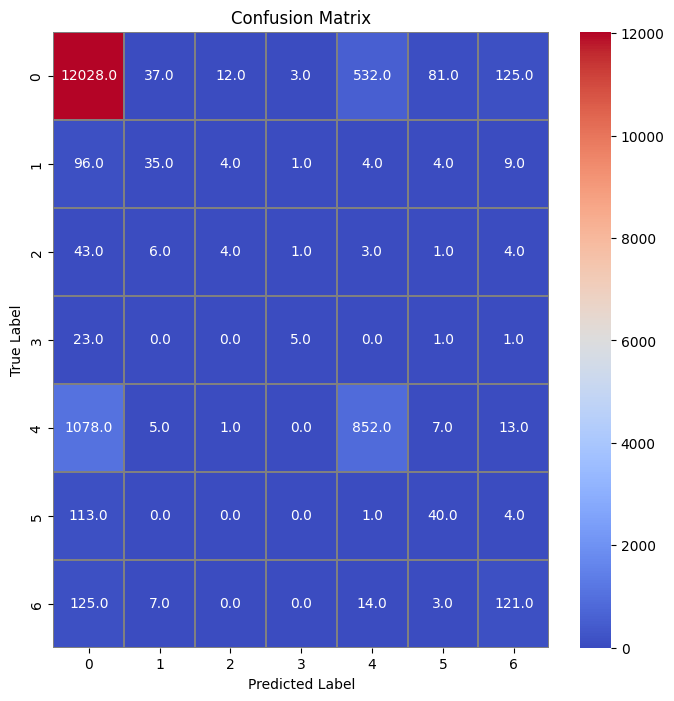

F1 Score: 0.84

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91     12818
           1       0.39      0.23      0.29       153
           2       0.19      0.06      0.10        62
           3       0.50      0.17      0.25        30
           4       0.61      0.44      0.51      1956
           5       0.29      0.25      0.27       158
           6       0.44      0.45      0.44       270

    accuracy                           0.85     15447
   macro avg       0.47      0.36      0.40     15447
weighted avg       0.83      0.85      0.84     15447



In [140]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Predict the values from the validation dataset
y_pred = model.predict([X_val_text, X_val_meta])

# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred, axis=1) 

# Convert validation observations to one hot vectors
y_true = np.argmax(y_val, axis=1) 

# compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes) 

# plot the confusion matrix
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01, cmap="coolwarm", linecolor="gray", fmt='.1f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# compute F1 score
f1 = f1_score(y_true, y_pred_classes, average='weighted')

print(f'F1 Score: {f1:.2f}')

# Print classification report
print('\nClassification Report:\n', classification_report(y_true, y_pred_classes))

<p>The introduction of metadata to the model has resulted in an intricate shift in performance dynamics, achieving a commendable training accuracy of 91.67% and a validation accuracy that peaked at 86.03%. Notably, while the overall F1 score of 0.84 indicates strong performance, this metric is heavily influenced by the model's proficiency in predicting the predominant 'no emotion' category. There is a clear discrepancy when it comes to the less represented classes, where precision and recall significantly drop, signaling an imbalance in the model's predictive power across different emotional states.</p>

<p>Furthermore, despite the enriched data through metadata, the model's performance plateau suggests a potential overfitting to the 'no emotion' category, highlighting a limitation in its ability to discern nuanced emotional shifts within dialogues. The challenge of analyzing dialogues as cohesive units remains, underscoring the need for more sophisticated models that can navigate the sequential and relational intricacies of conversational dynamics to capture complex emotional variations more effectively.</p>

<p>In light of these observations, we plan to pivot towards employing a transformer model, specifically utilizing the latest, cost-efficient ChatGPT model (gpt-3.5-turbo-0125). Our choice is driven by the inability to operationalize on-device transformer models effectively and the immediate availability and proven scalability of gpt-3.5-turbo-0125, which is already servicing millions of requests daily. This approach aims to leverage the advanced capabilities of transformer models in understanding and generating human-like text, potentially overcoming the current limitations in capturing the full emotional and contextual breadth of dialogues.</p>

<p>Prior to implementing the transformer model, our first step will be to carefully estimate the cost associated with running the model on the entire dataset. This essential preliminary analysis will ensure that our approach is not only technologically feasible but also economically viable, aligning with our resource management and budgetary constraints.</p>

In [132]:
# Assuming act_label and emotion_label dictionaries are defined as provided

def format_input_for_gpt(dialogue, utterance, utterance_idx, act_labels, emotion_labels):
    dialogue_act_text = [act_labels[str(act)] for act in dialogue['Act']]
    dialogue_emotion_text = [emotion_labels[str(emotion)] for emotion in dialogue['Emotion']]
    
    formatted_dialogue = ""
    for i, (line, act, emotion) in enumerate(zip(dialogue['Utterance'], dialogue_act_text, dialogue_emotion_text)):
        speaker = "Speaker 1:" if i % 2 == 0 else "Speaker 2:"
        formatted_dialogue += f"{speaker} {line} [Act: {act}, Emotion: {emotion}]\n"
    
    highlighted_utterance = f"Target Utterance: {utterance} [Index: {utterance_idx}]"
    prompt = f"Dialogue:\n{formatted_dialogue}\n{highlighted_utterance}\n\nPredict the act and emotion label for the target utterance."
    
    return prompt

### Preparing data for ChatGPT
Lets preprocess the whole dataset to see how much it would cost us to process the entire dataset:

In [133]:
prompts = []
dialogue_indices = df['DialogueIndex'].unique()

for dialogue_index in dialogue_indices:
    dialogue = df[df['DialogueIndex'] == dialogue_index]
    for utterance_idx, row in dialogue.iterrows():
        utterance = row['Utterance']
        utterance_idx = row['UtteranceIndex']
        prompt = format_input_for_gpt(dialogue, utterance, utterance_idx, act_label, emotion_label)
        prompts.append(prompt)

import tiktoken
enc = tiktoken.get_encoding("cl100k_base")

tokens = [enc.encode(prompt) for prompt in prompts]
num_tokens = [len(token) for token in tokens]
total_tokens = sum(num_tokens)

cost_per_1000_tokens = 0.0005 # gpt-3.5-turbo-0125
total_cost = (total_tokens / 1000) * cost_per_1000_tokens

print(f'Total cost: ${total_cost} ({total_tokens} tokens)')

Total cost: $16.991747 (33983494 tokens)


<p>Given the total cost of $16.991747 for processing 33 million tokens, we find this expenditure manageable. However, for the sake of efficiency and focusing our resources judiciously, we will proceed with a more concentrated test involving a sample size of 100. This approach allows us to refine our model with precision while staying mindful of budgetary allocations.</p>

In [103]:
from openai import OpenAI

client = openai.OpenAI(api_key = '')

# Ensure columns for act and emotion predictions exist
if 'act_generated' not in df.columns:
    df['act_generated'] = None
if 'emotion_generated' not in df.columns:
    df['emotion_generated'] = None

maximum, count = 100, 0
for index, row in df.iterrows():
    if count >= maximum:
        break
    else:
        count += 1
        print(" ".join(["Row", str(count), "of", str(maximum)]))
    prompt = f"Emotion and Act table:\nAct: {row['Act']}\nEmotion: {row['Emotion']}\n\nEntire Dialogue: {row['Dialogue']}\n\nUtterance: {row['Utterance']}\n\nPredict the index of an emotion and act label for the utterance."

    try:
        response = client.chat.completions.create(
            model="gpt-3.5-turbo-0125",
            messages=[
                {
                    "role": "system",
                    "content": "You perform semantic analysis and emotion extraction on text.\n\nAct Labels: '0'='__dummy__','1'='inform','2'='question','3'='directive','4'='commissive'\n\nEmotion Labels: '0'='no emotion','1'='anger','2'='disgust','3'='fear','4'='happiness','5'='sadness','6'='surprise'\n\nAnswer in the format of:\nAct: 9\nEmotion: 8"
                },
                {
                    "role": "user",
                    "content": prompt
                }
            ],
            temperature=0.5,
            max_tokens=256,
            top_p=1,
            frequency_penalty=0,
            presence_penalty=0
        )
        act_emotion = [int(c.split(': ')[1]) for c in response.choices[0].message.content.strip().split('\n')]
        
        # Map the response to the DataFrame
        df.at[index, 'act_generated'] = act_emotion[0]  # Assuming the first number is act
        df.at[index, 'emotion_generated'] = act_emotion[1]  # Assuming the second number is emotion
    except Exception as e:
        print(f"An error occurred for index {index}: {e}")


Row 1 of 100
Row 2 of 100
Row 3 of 100
Row 4 of 100
Row 5 of 100
Row 6 of 100
Row 7 of 100
Row 8 of 100
Row 9 of 100
Row 10 of 100
Row 11 of 100
Row 12 of 100
Row 13 of 100
Row 14 of 100
Row 15 of 100
Row 16 of 100
Row 17 of 100
Row 18 of 100
Row 19 of 100
Row 20 of 100
Row 21 of 100
Row 22 of 100
Row 23 of 100
Row 24 of 100
Row 25 of 100
Row 26 of 100
Row 27 of 100
Row 28 of 100
Row 29 of 100
Row 30 of 100
Row 31 of 100
Row 32 of 100
Row 33 of 100
Row 34 of 100
Row 35 of 100
Row 36 of 100
Row 37 of 100
Row 38 of 100
Row 39 of 100
Row 40 of 100
Row 41 of 100
Row 42 of 100
Row 43 of 100
Row 44 of 100
Row 45 of 100
Row 46 of 100
Row 47 of 100
Row 48 of 100
Row 49 of 100
Row 50 of 100
Row 51 of 100
Row 52 of 100
Row 53 of 100
Row 54 of 100
Row 55 of 100
Row 56 of 100
Row 57 of 100
Row 58 of 100
Row 59 of 100
Row 60 of 100
Row 61 of 100
Row 62 of 100
Row 63 of 100
Row 64 of 100
Row 65 of 100
Row 66 of 100
Row 67 of 100
Row 68 of 100
Row 69 of 100
Row 70 of 100
Row 71 of 100
Row 72 of 100
R

In [114]:
# Step 1: Filter DataFrame for non-null generated labels
filtered_df = df.dropna(subset=['act_generated', 'emotion_generated'])

# Step 2: Analyze the Distribution of Generated Labels
act_distribution = filtered_df['act_generated'].value_counts()
emotion_distribution = filtered_df['emotion_generated'].value_counts()

# Print the distributions
print("Distribution of Generated Act Labels:")
print(act_distribution)
print("\nDistribution of Generated Emotion Labels:")
print(emotion_distribution)


Distribution of Generated Act Labels:
act_generated
1    60
2    34
3     4
4     2
Name: count, dtype: int64

Distribution of Generated Emotion Labels:
emotion_generated
0    50
4    28
1     8
5     8
2     2
3     2
6     2
Name: count, dtype: int64


In [134]:
# Calculate act and emotion prediction accuracies
act_accuracy = (filtered_df['Act'] == filtered_df['act_generated']).mean()
emotion_accuracy = (filtered_df['Emotion'] == filtered_df['emotion_generated']).mean()

# Count the number of exact matches (both act and emotion are correctly predicted)
exact_matches = ((filtered_df['Act'] == filtered_df['act_generated']) & (filtered_df['Emotion'] == filtered_df['emotion_generated'])).sum()

# Adjust to use the total number of rows from filtered_df for accurate percentage calculation
total_rows_filtered = filtered_df.shape[0]

# Calculate the percentage of exact matches
exact_match_percentage = (exact_matches / total_rows_filtered) * 100

# Print the results with clear descriptions
print(f"Act Prediction Accuracy: {act_accuracy*100:.2f}%")
print(f"Emotion Prediction Accuracy: {emotion_accuracy*100:.2f}%")
print(f"Number of Exact Matches (Act & Emotion): {exact_matches} out of {total_rows_filtered} samples")
print(f"Exact Match Percentage: {exact_match_percentage:.2f}%")


Act Prediction Accuracy: 51.00%
Emotion Prediction Accuracy: 68.00%
Number of Exact Matches (Act & Emotion): 37 out of 100 samples
Exact Match Percentage: 37.00%


<p>The analysis aimed to assess the model's performance in identifying actions (acts) and emotions in dialogues, key for applications like chatbots and sentiment analysis. By measuring act and emotion accuracy separately and then calculating the exact match rate (where both act and emotion are predicted correctly), we sought to gauge the model's holistic understanding of dialogue dynamics. This approach helps identify the model's strengths and pinpoint areas needing improvement, guiding future enhancements for more nuanced and empathetic human-machine interactions.</p>

<p>Results indicated a moderate success in emotion recognition and a lower rate of exact matches, highlighting the challenge of integrating these aspects cohesively. This suggests while the model can grasp emotional contexts to some extent, achieving a comprehensive understanding of both the actions and emotions within dialogues remains a complex task, necessitating further refinement.</p>

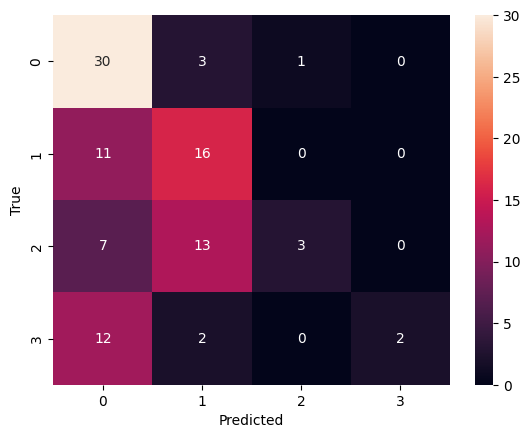

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(filtered_df['Act'], filtered_df['act_generated'].astype(int))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


<p>A poor showing from GPT3.5</p>

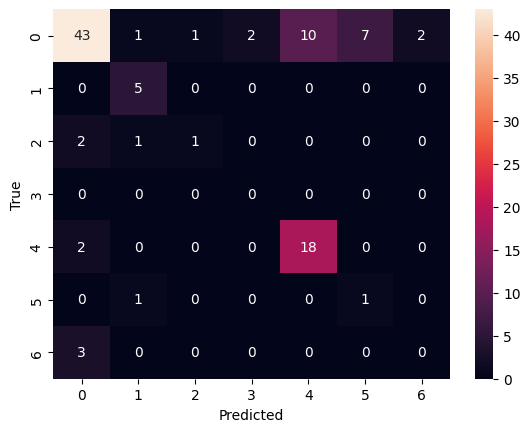

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(filtered_df['Emotion'], filtered_df['emotion_generated'].astype(int))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


<p>Wow that's even worse</p>

## Conclusion
In conclusion, our journey through the landscape of dialogue act and emotion classification has been a progressive one, beginning with fundamental techniques before advancing to more sophisticated models. The initial approach utilized a basic sentiment analysis method leveraging TextBlob, which yielded a promising 82% accuracy, illustrating the potential of even simple models when aptly applied. This foundational model set a baseline by effectively categorizing sentiment polarity, showing that straightforward methods can be surprisingly powerful.

However, the subsequent utilization of GPT-3.5 for finer-grained classification encountered difficulties, resulting in a less than satisfactory performance. While it's tempting to attribute this shortfall to the model's limitations in capturing the intricacies of human dialogue acts and emotions, it is also critical to acknowledge the part played by the setup of the code. In hindsight, the implementation may not have fully harnessed the capabilities of GPT-3.5, which is known for its prowess in natural language understanding and generation. This mixed outcome serves as a reminder of the importance of precise model tuning and the complexity of natural language processing tasks. It emphasizes that achieving high accuracy in nuanced tasks like emotion and act classification requires a careful balance of the right tools and the right approach to applying them.